[^ gor: Uvod](00_uvod.ipynb)

# Reševanje enačb z bisekcijo
Vsako enačbo $l(x)=d(x)$ lahko prevedemo na iskanje  ničle funkcije
$$f(x)=l(x)-d(x)=0.$$
Ničlo **zvezne** funkcije lahko zanesljivo poiščemo z [bisekcijo](https://sl.wikipedia.org/wiki/Bisekcija_%28numeri%C4%8Dna_metoda%29). Ideja je preprosta. Če so vrednosti funkcije v krajiščih intervala $[a,b]$ različnega predznaka, potem znotraj intervala $(a,b)$ zagotovo leži ničla ($x\in(a,b)$, za katerega je $f(x)=0$). 

Recimo, da je $f(a)>0$ in $f(b)<0$. Če izračunamo vrednost funkcije v središču intervala $c=\frac{1}{2}(a+b)$, lahko interval, za katerega vemo, da vsebuje ničlo, zmanjšamo na polovico. 

 * Če je $f(c)=0$, smo ničlo že našli in lahko prenehamo z iskanjem. 
 * Če je $f(c)<0$, potem je ničla zagotovo na intervalu $(a,c)$, 
 * če pa je $f(c)>0$, je ničla zagotovo na intervalu $(c,b)$. 
 
Če opisani postopek ponavljamo dovolj dolgo, lahko Interval, ki vsebuje ničlo, poljubno zmanjšamo, 


## Primer
Reši enačbo
$$x=2^{-x}.$$

## Rešitev
Enačbo lahko prevedemo na  iskanje ničle funkcije
$$f(x) = x-2^{-x}.$$

Najprej poiščemo interval za katerega smo prepričani, da vsebuje ničlo. Iščemo dve vrednosti $x$, za katere ima $f(x)$ različni predznak.

In [1]:
f = lambda x: x-2**(-x)
a,b=(0,1) # začetni interval 
(f(a),f(b))

(-1, 0.5)

Vidimo, da sta $f(0)$ in $f(1)$ različnega predznaka, kar pomeni, da je na intervalu $(0,1)$ ničla.

In [2]:
def bisekcija(f,a,b,n):
    """bisekcija(f,a,b,n) z bisekcijo izračuna interval širine (b-a)/2**n na katerem leži ničla funkcije f."""
    if n<=0:
        return (a,b)
    fa, fb = (f(a),f(b))
    assert (fa*fb)<=0, "Predznaka v krajiščih intervala [%f,%f] sta enaka" % (a,b) 
    c = (a+b)/2 # središče intervala
    fc = f(c)
    if fc == 0:
        return (c,c)
    elif fc*fa<=0:
        return bisekcija(f,a,c,n-1)
    else:
        return bisekcija(f,c,b,n-1)

In [3]:
a,b = (0,1)
# 10 korakov bisekcije
for i in range(10):
    print(bisekcija(f,a,b,i))

(0, 1)
(0.5, 1)
(0.5, 0.75)
(0.625, 0.75)
(0.625, 0.6875)
(0.625, 0.65625)
(0.640625, 0.65625)
(0.640625, 0.6484375)
(0.640625, 0.64453125)
(0.640625, 0.642578125)


Predstavimo bisekcijo še grafično.

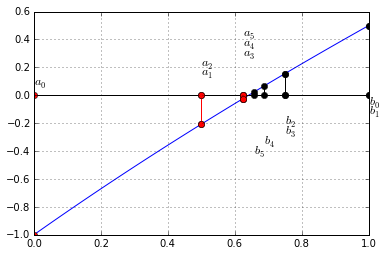

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
a , b = (0,1)
t = np.linspace(a,b)
plt.plot(t,f(t))
plt.plot([0,1],[0,0],'k')
for i in range(6):
    plt.plot([a,a],[0,f(a)],'r-o') # levo krajišče
    plt.plot([b,b],[0,f(b)],'k-o') # desno krajišče
    plt.annotate("$a_%d$" % i, xy = (a,0),xytext = (a,0.07*(i+1)),fontsize=12)
    plt.annotate("$b_%d$" % i, xy = (b,0),xytext = (b,-0.07*(i+1)),fontsize=12)
    a,b = bisekcija(f,a,b,1)
plt.grid()

In [5]:
import disqus
%reload_ext disqus
%disqus matpy